In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [8]:
import torch
import torch.nn as nn

In [42]:
class KNN(nn.Module):

    def __init__(self, *args, **kwargs):
        super(KNN, self).__init__(args, kwargs)

    def train(self, X, Y, k=2, *args, **kwargs):
        pass

In [109]:
class KNN2D(nn.Module):

    def __init__(self, *args, **kwargs):
        super(KNN2D, self).__init__(*args, **kwargs)

    def eq_distant(self, x1, x2):
        return ((x1[0] - x2[0])**2 + (x1[1]- x2[1])**2)**.5

    def train(self, X, Y):
        self.pal = list(zip(X, Y))
        # self.n_classes = len(set(Y))
    
    def predict(self, X, k=2):
        y_end = []
        for point in X:
            distance_list = [ [self.eq_distant(point, p2[0]), p2[1]] for i, p2 in enumerate(self.pal) ]
            class_counter_list = {i[1]:0 for i in self.pal}
            distance_list = sorted(distance_list)
            for i in range(k):
                class_counter_list[distance_list[i][1]] += 1
            y_end.append(sorted(class_counter_list, key=class_counter_list.get, reverse=True)[0])
        return y_end
    

In [25]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [24]:
X1, Y1 = make_blobs(n_features=2, centers=3)

In [29]:
xtr, xte, ytr, yte = train_test_split(X1, Y1, train_size=.8)

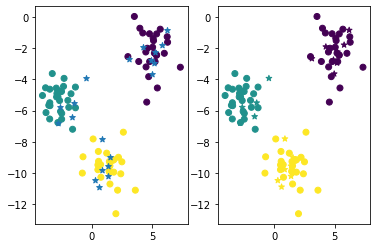

In [110]:
fig, axes = plt.subplots(ncols=2)
# print(X1.shape)
axes[0].scatter(xtr[:,0], xtr[:,1], marker='o', c=ytr)
axes[0].scatter(xte[:,0], xte[:,1], marker='*')

knn = KNN2D()
knn.train(xtr.tolist(), ytr.tolist())
# print(xte.tolist()[0])
yp = np.array(knn.predict(xte.tolist(), k=2))
# print(len(yp))
axes[1].scatter(xtr[:,0], xtr[:,1], marker='o', c=ytr)
axes[1].scatter(xte[:,0], xte[:,1], marker='*', c=yp)
